# Predicting Zomato Restaurant Rate

### 1. Business Problem

### 1.1 Problem Description

- Does demography of area matters?
- Does location of particular type of restraurant depends on people living in that area>
- Does theme of restraurant matters?
- Is food chain category restraurant likely to have more customers than its counter part?
- Are any neighbourhood on similar based on the type of food?
- Is particular neighbours is famous for itw own kind of food?
- If two neighbours are similar does that mean these are related or particular group of people live in neighbourhood or these are places to eat.
- What kind of food is famous in locality.
- Do entire locality loves veg food, if yes then locality populated by particular set of people eg Jain, Gujarati,Marwadi who are basically veg.


### 1.2. Problem Statement
The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

### 1.3 Business Objectives

### 1.4 Machine Learning  Formulation

### 1.5 Performance Metrics

## 2. Data

### 2.1 Data Download

Zomato API was used to download data. Data was fetched from Zomato API by making zomatoWrapper package. Description on zomatoWrapper package can be found here:

https://github.com/ashish-gh/zomatoWrapper

Zomato API provides data in json which was later stored in .csv file. Particularly two API endpoints were used to fetch data. Finally the data were merged and final csv file was produced. Data storage manipulation process can be found here:

https://github.com/ashish-gh/Exploratory_Data_Analysis_Zomato_Restaurant/blob/master/DataStorage_and_Pre-processing.ipynb


### 2.2 Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('zomato_final.csv')
data.shape

(840, 21)

In [4]:
data.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_orvder_menu,price_range,aggregate_rating,rating_color,rating_text,votes,review
0,16668008,Arigato Sushi,37,Yorkton,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,"Yorkton, Yorkton",-102.461317,51.210682,Asian,25,0,0,0,0,2,3.3,CDD614,Average,26,['i love arigato sushi!!!! the best restaurant...
1,801690,Mocha,1,Lucknow,"CP-1, 2nd Floor, Anand Plaza, Viram Khand-1, N...",Gomti Nagar,"Gomti Nagar, Lucknow",81.001185,26.852810,"Cafe, Italian, Continental",800,0,0,0,0,3,4.6,3F7E00,Excellent,567,['I just Simply love This Place.....It is idea...
2,17558738,Blue House Cafe,216,Vernonia,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,0,0,0,0,1,4.3,5BA829,Very Good,88,"[""Delicious. There's not a single dish i've tr..."
3,16611701,Star Buffet,14,Mayfield,"58 Hanbury St, Mayfield, NSW",Mayfield,"Mayfield, Mayfield",151.734383,-32.899178,Asian,20,0,0,0,0,2,2.9,FFBA00,Average,11,"['A lot of food and many varieties, some of th..."
4,2100784,11th Avenue Cafe Bistro,1,Guwahati,"Opposite Assam State Museum, Dighalipukhuri, T...",Uzan Bazaar,"Uzan Bazaar, Guwahati",91.752314,26.186001,"Cafe, American, Italian, Continental",400,0,0,0,0,2,4.1,5BA829,Very Good,377,['11th avenue cafe has always been my favorite...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_id          840 non-null    int64  
 1   restaurant_name        840 non-null    object 
 2   country_code           840 non-null    int64  
 3   city                   840 non-null    object 
 4   address                840 non-null    object 
 5   locality               840 non-null    object 
 6   locality_verbose       840 non-null    object 
 7   longitude              840 non-null    float64
 8   latitude               840 non-null    float64
 9   cuisines               840 non-null    object 
 10  average_cost_for_two   840 non-null    int64  
 11  has_table_booking      840 non-null    int64  
 12  has_online_delivery    840 non-null    int64  
 13  is_delivering_now      840 non-null    int64  
 14  switch_to_orvder_menu  840 non-null    int64  
 15  price_

In [6]:
# country_code,address locality, locaity_verbose, switch_to_orvder_menu, switch_to_orvder_menu, rating_color,
data.votes.describe()

count     840.000000
mean      201.284524
std       472.938189
min         0.000000
25%         9.000000
50%        66.000000
75%       211.250000
max      4986.000000
Name: votes, dtype: float64

### Column description

In [7]:
data.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'switch_to_orvder_menu', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes', 'review'],
      dtype='object')

- restaurant_id: contains unique id for each restaurant
- restaurant_name: contains the name of the restaurant
- country_code: containts the country code in which the restaurant is situated
- city: 

- address: contains the address of the restaurant

- locality:

- locality_verbose:

- longitude: 

- latitude: 

- cuisines:

- average_cost_for_two:

- has_table_booking:

- has_online_delivery:
- is delivering_now:
- switch_to_order_now:
- price_range 
- aggregated_rating


### 2.3 Data preprocess

In [8]:
# explore columns related to the addrress
data.loc[:,['address','city','locality', 'locality_verbose']].sample(8,random_state=1)

,address,city,locality,locality_verbose
480,"B-422, Sarita Vihar, New Delhi",New Delhi,Sarita Vihar,"Sarita Vihar, New Delhi"
111,"Shop 9, Market 1, Chittaranjan Park, New Delhi",New Delhi,Chittaranjan Park,"Chittaranjan Park, New Delhi"
238,"P-11, 2nd Floor, Green Park Extension, Green P...",New Delhi,Green Park,"Green Park, New Delhi"
597,"7, A Pocket Market, Sarita Vihar, New Delhi",New Delhi,Sarita Vihar,"Sarita Vihar, New Delhi"
801,"27, C.S.C. Market 2, Chittaranjan Park, New Delhi",New Delhi,Chittaranjan Park,"Chittaranjan Park, New Delhi"
624,"6, Corner Market, Near Hanuman Temple, Malviya...",New Delhi,Malviya Nagar,"Malviya Nagar, New Delhi"
834,"Ground Floor, Adjacent To Ambience Towers Car ...",New Delhi,Vasant Kunj,"Vasant Kunj, New Delhi"
553,"Shop 2, Lower Ground Floor, Epicuria Food Mall...",New Delhi,"Epicuria Food Mall, Nehru Place","Epicuria Food Mall, Nehru Place, New Delhi"


Here, we can see that among 4 columns 2 represent same information. So just dropping column which are not important.
- we are going to keep the `city` column and drop the address, locality, locality_verbose

- columns country_code, switch_to_order_menu, rating_color,


In [0]:
# drop unnecessary columns
column_to_drop = ['restaurant_id', 'address','locality', 'locality_verbose' ,'country_code','switch_to_orvder_menu', 'rating_color']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [10]:
data.columns

Index(['restaurant_name', 'city', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'price_range', 'aggregate_rating', 'rating_text',
       'votes', 'review'],
      dtype='object')

###  2.3.1 Remove Duplicates

**Q.1) Is there duplicate values present in dataset? If yes then many of them are duplicate?**

In [11]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   0


### 2.3.1 Removing Null values

**Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?**

In [12]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

restaurant_name         0.0
city                    0.0
longitude               0.0
latitude                0.0
cuisines                0.0
average_cost_for_two    0.0
has_table_booking       0.0
has_online_delivery     0.0
is_delivering_now       0.0
price_range             0.0
aggregate_rating        0.0
rating_text             0.0
votes                   0.0
review                  0.0
dtype: float64

In [13]:
type(data.review)

pandas.core.series.Series

In [14]:
# for restaurant name

name_all = ""
for name in data['review']:
    if isinstance(name,str) and len(name)>0:
        name = name.lower()
        name_all += str(name)+" "

def has_special_char(text: str) -> bool:
    return any(c for c in text if not c.isalnum() and not c.isspace())

special_character=""
for text in name_all:
        if has_special_char(text):
            special_character += str(text)        

# print(list(set(special_character)))
special_character = list(set(special_character))
len(special_character)


184

In [15]:
characters = [''.join(character for character in special_character)]
characters

['🍺💞🔆☺▫🍟😍ि🤣\U0001f967😡🍰🍖🥙🎂&्ा💗️💙💰"💯♡📺😕💓🌮\U0001f92c🏾#😉.👿😭े👣😜😩💕@😊”ु\U0001f970😬😇^🍸🤗🌟—:💁🍻•~🤔💘🏼🏻‘!☝’♥…>ं😛,▪✨_🈶🙋🚬\\😑🌯📍🕺👅🍴₹🙈\U0001f96a🍨\U0001f91f\U0001f92a।\U0001f99e⠀❤💡\U0001f92e☕`)😣🙅👍😔;🙂😱♂[🍩🤢👀🙏(😁🍹😐\'😂ै🤘🥂|💖“😃+🍁🌶😘%︎👭🍱😈👌🤦🥖🌸🥞🙃💟\U0001f929😎🥇✔❣🔸?🍜👎🍝}$💥💸ँ{➡🍽⭐🐔ू✌–📚🍚/=🍔]\U0001f9f9🥘*😋🔥ी🍗😀💫😠🍷-🤤']

In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()    
    
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    
    text = re.sub(r'>\u200b“–\\`🍅‐♥•°„', '', text)
    
    text = re.sub(r'\'', '', text)
    
    text = re.sub(r'  ', ' ', text)
    
    text = re.sub(r'\d+', '', text)    
    
    text = text.split()
    
    text =  [word for word in text if not word in set(stopwords.words("english"))]
    
#     stops = set(stopwords.words("english"))
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops]
#     text = " ".join(text)

    text = ' '.join(text)


    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
data.review = data.review.apply(lambda x: clean_text(x))
data.review

0      love arigato sushi best restaurant yorkton alw...
1      simply love placeit ideal breakfastlunchdinner...
2      delicious theres single dish ive tried blue ho...
3      lot food many varieties sushi fresh love many ...
4      th avenue cafe always favoriteloved cheesy mea...
                             ...                        
835    angels always excellent confectionery chocolat...
836    owner much bad cheat staff salary product fres...
837    casual meet office collegues ordered pasta alf...
838    guy serving sense explain drinks showed drink ...
839    nan service need improve food tastes great aff...
Name: review, Length: 840, dtype: object

In [0]:
# def no_special_character(text: str) -> bool:
#     return any(c for c in text if c.isalnum() and c.isspace())

In [0]:
# # data['process_text'] = data.review.apply(lambda x: no_special_character(x))
# process_text=""
# for text in data.review:
#         if has_special_char(text):
#             process_text += str(text)        

# process_text

In [20]:
data.cuisines

0                                            Asian
1                       Cafe, Italian, Continental
2                    Coffee and Tea, Mediterranean
3                                            Asian
4             Cafe, American, Italian, Continental
                          ...                     
835                    Bakery, Desserts, Fast Food
836                                 Cafe, Desserts
837             Finger Food, North Indian, Italian
838             North Indian, Street Food, Mughlai
839    North Indian, Chinese, South Indian, Mithai
Name: cuisines, Length: 840, dtype: object

In [21]:
data.cuisines = data.cuisines.apply(lambda x: clean_text(x))
data.cuisines

0                                         asian
1                      cafe italian continental
2                      coffee tea mediterranean
3                                         asian
4             cafe american italian continental
                         ...                   
835                   bakery desserts fast food
836                               cafe desserts
837            finger food north indian italian
838            north indian street food mughlai
839    north indian chinese south indian mithai
Name: cuisines, Length: 840, dtype: object

### 2.4 Data Visualizations

Mean is :  2.954047619047617


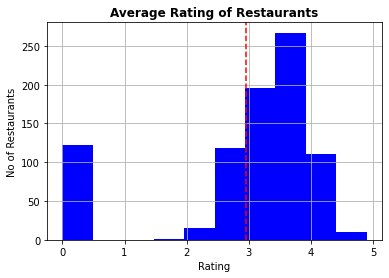

In [22]:
# sns.distplot(data.aggregate_rating, kde=False, bins=20)

data.aggregate_rating.hist(color='blue')
plt.axvline(x= data.aggregate_rating.mean(),ls='--',color='red')
plt.title('Average Rating of Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",data.aggregate_rating.mean())

Text(0, 0.5, 'No of revies')

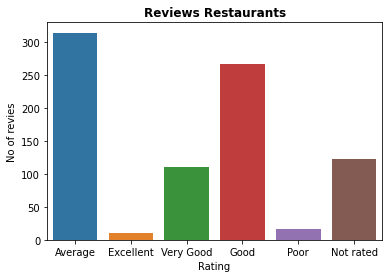

In [23]:
# data.rating_text.hist(color='blue')
sns.countplot(x=data.rating_text, data=data)
plt.title('Reviews Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of revies')

#### Observation

**Q.5) Which are the top 20 restaurant**

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

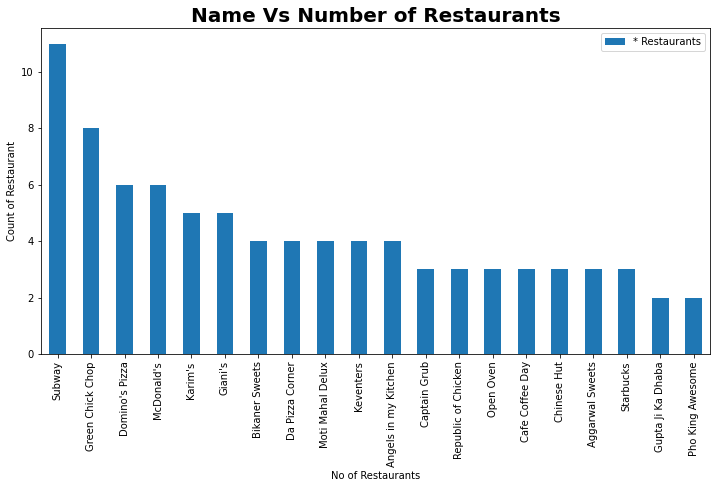

In [24]:

plt.figure(figsize=(12,6))
ax =data.restaurant_name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

## 3. Model

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_name       840 non-null    object 
 1   city                  840 non-null    object 
 2   longitude             840 non-null    float64
 3   latitude              840 non-null    float64
 4   cuisines              840 non-null    object 
 5   average_cost_for_two  840 non-null    int64  
 6   has_table_booking     840 non-null    int64  
 7   has_online_delivery   840 non-null    int64  
 8   is_delivering_now     840 non-null    int64  
 9   price_range           840 non-null    int64  
 10  aggregate_rating      840 non-null    float64
 11  rating_text           840 non-null    object 
 12  votes                 840 non-null    int64  
 13  review                840 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 92.0+ KB


In [0]:
# drop unnecessary columns
column_to_drop = ['longitude','latitude']
data.drop(columns=column_to_drop, axis=1,inplace=True)

### 3.1 Converting to dummy variables

In [27]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['has_table_booking']= pd.get_dummies(data.has_table_booking, drop_first=True)
data['has_table_booking']= pd.get_dummies(data.has_table_booking, drop_first=True)
data['is_delivering_now']= pd.get_dummies(data.is_delivering_now, drop_first=True)

data 

,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,price_range,aggregate_rating,rating_text,votes,review
0,Arigato Sushi,Yorkton,asian,25,0,0,0,2,3.3,Average,26,love arigato sushi best restaurant yorkton alw...
1,Mocha,Lucknow,cafe italian continental,800,0,0,0,3,4.6,Excellent,567,simply love placeit ideal breakfastlunchdinner...
2,Blue House Cafe,Vernonia,coffee tea mediterranean,10,0,0,0,1,4.3,Very Good,88,delicious theres single dish ive tried blue ho...
3,Star Buffet,Mayfield,asian,20,0,0,0,2,2.9,Average,11,lot food many varieties sushi fresh love many ...
4,11th Avenue Cafe Bistro,Guwahati,cafe american italian continental,400,0,0,0,2,4.1,Very Good,377,th avenue cafe always favoriteloved cheesy mea...
...,...,...,...,...,...,...,...,...,...,...,...,...
835,Angels in my Kitchen,New Delhi,bakery desserts fast food,350,0,1,0,1,3.7,Good,248,angels always excellent confectionery chocolat...
836,Red Mango,New Delhi,cafe desserts,700,0,1,0,2,3.7,Good,185,owner much bad cheat staff salary product fres...
837,The Beer Cafe,New Delhi,finger food north indian italian,1250,0,0,0,3,3.8,Good,170,casual meet office collegues ordered pasta alf...
838,Punjabi By Nature Express,New Delhi,north indian street food mughlai,600,0,0,0,2,3.5,Good,206,guy serving sense explain drinks showed drink ...


In [28]:
#  cuisines converted to categorical features

data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

indian north                    63
indian mughlai north            47
chinese indian north            36
chinese indian mughlai north    36
chinese                         31
Name: cuisines, dtype: int64

In [0]:
data = data.rename(columns={
    'average_cost_for_two':'average_cost',
    'aggregate_rating':'rate'
    })

## 3.2 Splitting data for Model Building

In [0]:
# build x & y dataset
x = data.drop(['restaurant_name','rate'],axis = 1)
y = data['rate']

In [31]:
x.shape, y.shape

((840, 10), (840,))

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588, 10), (252, 10), (588,), (252,))

In [0]:
# One hot encoder
enc = OneHotEncoder( handle_unknown='ignore')

In [0]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [0]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rating_text = one_hot_fit_transform(X_train,'rating_text' )
te_dummy_rating_text = one_hot_transform(X_test,'rating_text' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'city' )
te_dummy_city= one_hot_transform(X_test,'city')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines = one_hot_transform(X_test,'cuisines')

In [37]:
tr_dummy_rating_text.shape, te_dummy_rating_text.shape

((588, 6), (252, 6))

In [38]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((588, 212), (252, 212))

In [39]:
tr_dummy_city.shape, te_dummy_city.shape

((588, 17), (252, 17))

In [40]:
## combine all 'one-hot' encoded features as Tr.
tr =pd.DataFrame(pd.np.column_stack([ tr_dummy_rating_text,tr_dummy_city, tr_dummy_cuisines]))

## CONCAT both dataframe ### ie Tr and X_train(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(588, 245)

In [41]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ te_dummy_rating_text,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(252, 245)

In [0]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['city','rating_text','cuisines','review'],axis = 1)
X_test =X_test.drop(['city','rating_text','cuisines','review'],axis = 1)

In [54]:
X_train.head(2)

,average_cost,has_table_booking,has_online_delivery,is_delivering_now,price_range,votes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234
0,550,0,1,0,2,21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500,0,1,0,2,167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588, 241), (252, 241), (588,), (252,))

In [56]:
print(x.shape)
print(y.shape)

(840, 10)
(840,)


In [57]:
dump(X_train, 'max_features_pkl/more_feature_X_train')
dump(X_test, 'max_features_pkl/more_feature_X_test')
dump(y_train, 'max_features_pkl/more_feature_y_train')
dump(y_test, 'max_features_pkl/more_feature_y_test')

['max_features_pkl/more_feature_y_test']

In [0]:
X_train= load('max_features_pkl/more_feature_X_train') 
X_test= load('max_features_pkl/more_feature_X_test')
y_train= load('max_features_pkl/more_feature_y_train')
y_test= load('max_features_pkl/more_feature_y_test')

In [0]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

## Building Random Model(For Worst case MSE)

In [119]:
import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

2.825807539682541

Here we can see that random model provide 2.53 MSE value. We can take this as a cut off. Any model which has MSE less than random model is considered as better model.

## Model -1 Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

0.04307165102083918

## Model -2 Random Forest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.03838209645502626

### Feature Importance

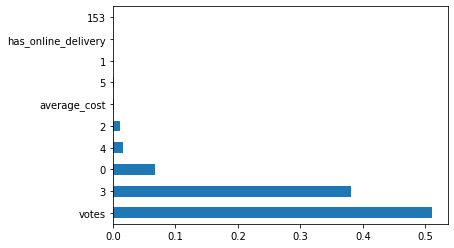

In [122]:
import matplotlib.pyplot as plt

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [63]:
tuned_parameters = {'n_estimators': [150]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

y_pred_grd = grd_regressor.predict(X_test)

mse(y_test, y_pred_grd)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.8s finished


0.03780327174958705

After above experiment we got below result

- MSE:  0.04004986221340383 == 50(n_estimators)
- MSE:  0.03807506691137555 == 100 (n_estimators)
- MSE:  0.0377001297623944 == 150 (n_estimators)
- MSE:  0.03828087737268492 ==200(n_estimators)
- MSE:  0.03799677087809369 ===500 (n_estimators)

Final n_estimators choose 150


### Best Parameter Model

In [64]:

rfr = RandomForestRegressor(max_depth=None,n_estimators=150,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.03749880657211414

In [65]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
660,0.0,0.000000
622,3.7,3.767000
645,0.0,0.000000
286,3.1,2.962667
457,2.8,3.248667
...,...,...
170,3.2,3.121333
42,4.0,4.130000
516,4.1,4.056000
184,3.2,2.985944


### MSE = 0.0377 , It is good Model still can we still improved Model?

## Model 3: Natural Language Processing

### 3.1 NLP on review data

In [182]:
data_nlp = pd.read_csv('zomato_final.csv')
data_nlp.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_orvder_menu,price_range,aggregate_rating,rating_color,rating_text,votes,review
0,16668008,Arigato Sushi,37,Yorkton,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,"Yorkton, Yorkton",-102.461317,51.210682,Asian,25,0,0,0,0,2,3.3,CDD614,Average,26,['i love arigato sushi!!!! the best restaurant...
1,801690,Mocha,1,Lucknow,"CP-1, 2nd Floor, Anand Plaza, Viram Khand-1, N...",Gomti Nagar,"Gomti Nagar, Lucknow",81.001185,26.852810,"Cafe, Italian, Continental",800,0,0,0,0,3,4.6,3F7E00,Excellent,567,['I just Simply love This Place.....It is idea...
2,17558738,Blue House Cafe,216,Vernonia,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,0,0,0,0,1,4.3,5BA829,Very Good,88,"[""Delicious. There's not a single dish i've tr..."
3,16611701,Star Buffet,14,Mayfield,"58 Hanbury St, Mayfield, NSW",Mayfield,"Mayfield, Mayfield",151.734383,-32.899178,Asian,20,0,0,0,0,2,2.9,FFBA00,Average,11,"['A lot of food and many varieties, some of th..."
4,2100784,11th Avenue Cafe Bistro,1,Guwahati,"Opposite Assam State Museum, Dighalipukhuri, T...",Uzan Bazaar,"Uzan Bazaar, Guwahati",91.752314,26.186001,"Cafe, American, Italian, Continental",400,0,0,0,0,2,4.1,5BA829,Very Good,377,['11th avenue cafe has always been my favorite...


In [183]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

word_counter = []
def clean_text(text):
    
    text = text.lower()    
    
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    
    text = re.sub(r'>\u200b“–\\`🍅‐♥•°„', '', text)
    
    text = re.sub(r'\'', '', text)
    
    text = re.sub(r'  ', ' ', text)
    
    text = re.sub(r'\d+', '', text)    
    
    text = text.split()
    
    text =  [word for word in text if not word in set(stopwords.words("english"))]
    
    text = ' '.join(text)

    count = len(text.split())
    
    word_counter.append(count)
    
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [185]:
data_nlp.review = data_nlp.review.apply(lambda x: clean_text(x))
data_nlp.review = data_nlp.review.apply(lambda x: decontracted(x))
data_nlp.review[1]

'simply love placeit ideal breakfastlunchdinnerall three mealsand snacking course shakescoffees preparations top quality full flavours shortcoming pocket friendlyand people don’t smoke hukkah might feel uncomfortable 😣else open air view really beautiful ignoring drawbacksthis place excellent recommended 😊 place thrice everytime great experience quite huge lively place loved ambience interiors service food exceptionally great also place always crowded might wait get place dine place servess bestt food \U0001f96a🍔🍴🍱 delicious yummy food soft drinks available 🥂🥂 lot food options good quality food better services \U0001f9f9💡 affordable rates 💸💸💸💸 foodie makess roam around area allow taste delicious food 🍴🍱🍱🍔\U0001f96a\U0001f96a must visit cafee'

In [0]:
data_nlp['word_count'] = word_counter

In [188]:
# dropping unwanted columns
data_nlp = data_nlp.drop(['restaurant_id', 'restaurant_name', 'country_code', 'address','locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
        'switch_to_orvder_menu','rating_text' ,'price_range', 'rating_color',],axis = 1)
data_nlp

,city,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,votes,review,word_count
0,Yorkton,25,0,0,0,3.3,26,love arigato sushi best restaurant yorkton alw...,247
1,Lucknow,800,0,0,0,4.6,567,simply love placeit ideal breakfastlunchdinner...,99
2,Vernonia,10,0,0,0,4.3,88,delicious theres single dish ive tried blue ho...,55
3,Mayfield,20,0,0,0,2.9,11,lot food many varieties sushi fresh love many ...,306
4,Guwahati,400,0,0,0,4.1,377,th avenue cafe always favoriteloved cheesy mea...,48
...,...,...,...,...,...,...,...,...,...
835,New Delhi,350,0,1,0,3.7,248,angels always excellent confectionery chocolat...,76
836,New Delhi,700,0,1,0,3.7,185,owner much bad cheat staff salary product fres...,108
837,New Delhi,1250,0,0,0,3.8,170,casual meet office collegues ordered pasta alf...,73
838,New Delhi,600,0,0,0,3.5,206,guy serving sense explain drinks showed drink ...,155


### Exporting clean text review

In [0]:
data_nlp.to_csv (r'preprocessed_review.csv', index = False, header=True)

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

y = data_nlp['aggregate_rating']
X = data_nlp.drop(['aggregate_rating'],axis = 1)


# Splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

x_tr_txt = x_tr['review']
x_cv_txt = x_cv['review']
x_test_txt = x_test['review']

print(x_tr_txt.shape,y_tr.shape )
print(x_cv_txt.shape,y_cv.shape )
print(x_test_txt.shape,y_test.shape )

x_tr_txt = x_tr['review']
x_cv_txt = x_cv['review']
x_test_txt = x_test['review']

(537,) (537,)
(135,) (135,)
(168,) (168,)


In [191]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=10) #in scikit-learn
# train data
X_train_bow = count_vect.fit_transform(x_tr_txt)

# test data
x_cv_bow = count_vect.transform(x_cv_txt)
x_test_bow = count_vect.transform(x_test_txt)


print('X_train_bow',X_train_bow.shape)
print('==='*10)
print('x_cv_bow',x_cv_bow.shape)
print('==='*10)
print('x_test_bow',x_test_bow.shape)

X_train_bow (537, 856)
x_cv_bow (135, 856)
x_test_bow (168, 856)


### Linear regression on NLP

In [192]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_bow,y_tr)
y_pred_lr = lr.predict(x_cv_bow)

mse(y_cv, y_pred_lr)

13.277268709073342

### Random Forest on NLP

In [193]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_bow,y_tr)
y_pred_rfr = rfr.predict(x_cv_bow)

mse(y_cv, y_pred_rfr)

1.5741879925925928

#### observation

### LSTM Model

In [128]:

X = data['review']
y = data['rate']

# split the data set into train and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, shuffle=True)

print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)


(588,) (252,) (588,) (252,)


In [134]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Flatten, LSTM, Dense, Dropout
from keras.models import Sequential, Model
from keras.utils import plot_model

max_review_length = 600
top_words = 10000

## pass through tokenizer
tk = Tokenizer(lower = True, num_words= top_words)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
## add padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_review_length)
X_test_seq = tk.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_review_length)

print('train data shape ', X_train_pad.shape)
print('test data shape', X_test_pad.shape)

train data shape  (588, 600)
test data shape (252, 600)


In [135]:

# create the model
embedding_vecor_length = 256
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(200))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 256)          2560256   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               365600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 2,926,057
Trainable params: 2,926,057
Non-trainable params: 0
_________________________________________________________________
None


## LSTM parameter calculation

embedding_vecor_length = 256

top words = 10000+1 = 10001

params at emdedding layers = 10001* 256 = 2560256

lstm params = 4(nm + n^2 + n)
where,  n = no of units; <br>
m = input dimensions


here lstm units (n) = 200 and m = 256 dimensions
params at lstm_1: 4 (200 * 256  +  200^2  +  200) = 365600

at dropout there no training happens, so params 0

at dense,

(input dim + 1 (bias))* no of units

(200+1) * 1 = 201

final trainable params,  (2560256 + 365600 + 201) = 2,926,057


In [136]:
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), 
                    epochs=20, 
                    verbose=1
                    )

Train on 588 samples, validate on 252 samples
Epoch 1/20
588/588 [==============================] - 43s 74ms/step - loss: 6.1991 - val_loss: 1.7774
Epoch 2/20
588/588 [==============================] - 43s 73ms/step - loss: 1.9170 - val_loss: 1.6138
Epoch 3/20
588/588 [==============================] - 42s 72ms/step - loss: 1.6458 - val_loss: 1.5904
Epoch 4/20
588/588 [==============================] - 42s 72ms/step - loss: 1.3471 - val_loss: 1.5969
Epoch 5/20
588/588 [==============================] - 42s 72ms/step - loss: 0.7912 - val_loss: 1.6896
Epoch 6/20
588/588 [==============================] - 43s 72ms/step - loss: 0.4677 - val_loss: 1.7462
Epoch 7/20
588/588 [==============================] - 43s 73ms/step - loss: 0.2834 - val_loss: 1.6980
Epoch 8/20
588/588 [==============================] - 43s 72ms/step - loss: 0.2446 - val_loss: 1.7395
Epoch 9/20
588/588 [==============================] - 43s 72ms/step - loss: 0.2061 - val_loss: 1.7307
Epoch 10/20
588/588 [===============

In [138]:
# evaluate the model
train_mse = model.evaluate(X_train_pad, y_train, verbose=0)
test_mse = model.evaluate(X_test_pad, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.028, Test: 1.777


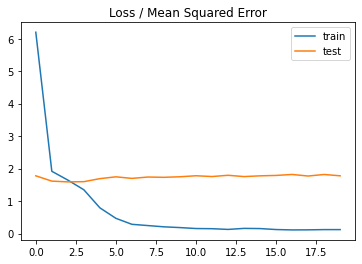

In [145]:
# # plot loss during training

plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Observation



In [146]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [0]:
y_pred_lstm = loaded_model.predict(X_test_pad)

In [0]:
y_pred_lstm = y_pred_lstm.flatten()

In [150]:
y_pred_lstm.shape, y_test.shape

((252,), (252,))

In [151]:
lstmpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lstm })
lstmpred

,actual,pred
375,2.5,3.480440
145,4.2,3.171870
642,0.0,2.624021
231,3.5,4.050784
668,2.7,3.896542
...,...,...
428,4.1,3.453871
361,3.3,3.188988
310,2.5,3.497883
769,3.5,3.417632


# 4. All Features

**Text data**
1. review


**Categorical data**
1. 
2.
3.
4.
5.

**Numerical data**
1. 
2.
3.
4.

#### Plan of attack:


- Step1:  For text features, we will use pre-trained **Word2Vec** model, introduce word embedding, pass throgh LSTM layer then flatten the output.

- Step2 : Similarly we will perform embedding on categorical data and flatten it.
- Step3 : Merge all numerical features and scale it.
- Step4 : We will concate all the feature under one block.
- Step5 : pass this blob through NN, let's the output.




## word 2 vec model

In [154]:

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# 
import gensim
from gensim import models

word2vec = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

# model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  

--2020-06-04 10:30:35--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.179
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  69.3MB/s    in 25s     

2020-06-04 10:31:01 (62.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

Found 3000000 word vectors of word2vec


### Embedding layer for text data

In [0]:
#importing clean text 
data_nlp = pd.read_csv('preprocessed_review.csv')

# seperating feature and target column
y = data_nlp['aggregate_rating']
X = data_nlp.drop(['aggregate_rating'],axis = 1)

In [0]:
# Define params

MAX_SEQUENCE_LENGTH = 500
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 300

In [197]:
## preproces

# Splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

x_tr_txt = x_tr['review']
x_cv_txt = x_cv['review']
x_test_txt = x_test['review']

print(x_tr_txt.shape,y_tr.shape )
print(x_cv_txt.shape,y_cv.shape )
print(x_test_txt.shape,y_test.shape )

x_tr_txt = x_tr['review']
x_cv_txt = x_cv['review']
x_test_txt = x_test['review']

(537,) (537,)
(135,) (135,)
(168,) (168,)


In [198]:
## vectorize a text corpus, here we given vocab_size
tk = Tokenizer(lower = True, num_words= MAX_NUM_WORDS)

## train
tk.fit_on_texts(x_tr_txt)
X_train_seq = tk.texts_to_sequences(x_tr_txt)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH) 
## MAX_SEQUENCE_LENGTH = 500


## test
X_test_seq = tk.texts_to_sequences(x_test_txt)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH) 
## MAX_SEQUENCE_LENGTH = 500

## cv
X_cv_seq = tk.texts_to_sequences(x_cv_txt)
X_cv_pad = pad_sequences(X_cv_seq, maxlen=MAX_SEQUENCE_LENGTH) 
## MAX_SEQUENCE_LENGTH = 500

print('train data shape ', X_train_pad.shape)
print('CV data shape ', X_cv_pad.shape)
print('test data shape', X_test_pad.shape)


train data shape  (537, 500)
CV data shape  (135, 500)
test data shape (168, 500)


In [199]:
print('Preparing embedding matrix.')

nb_words = min(MAX_NUM_WORDS, len(tk.word_index))+1

embedding_matrix_w2v = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
for word, i in tk.word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
      
    if word in word2vec.vocab:
        embedding_matrix_w2v[i] = word2vec.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix_w2v, axis=1) == 0))
        
print("Number for unique words in train data:", len(tk.word_index) + 1)
print("Shape of train weight matrix:", embedding_matrix_w2v.shape)

Preparing embedding matrix.
Null word embeddings: 32
Number for unique words in train data: 8370
Shape of train weight matrix: (1000, 300)


In [0]:
# Creating an input layer
input_size = min(MAX_NUM_WORDS, len(tk.word_index) + 1)
input_lay = Input(shape = (MAX_SEQUENCE_LENGTH, ), name = "input_text_data")

# Creating an embedding layer
embedding_layer = Embedding(input_dim = input_size,
                            output_dim = EMBEDDING_DIM,
                            weights=[embedding_matrix_w2v],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True, name = "lstm_text_data")(input_lay)
# LSTM layer
emb_lay_text = LSTM(256, return_sequences = True, dropout = 0.3)(embedding_layer)

# Flatten
flatten_1 = Flatten()(emb_lay_text)

### Embedding layer for Categorical Features


In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   city                  840 non-null    object
 1   average_cost_for_two  840 non-null    int64 
 2   has_table_booking     840 non-null    int64 
 3   has_online_delivery   840 non-null    int64 
 4   is_delivering_now     840 non-null    int64 
 5   votes                 840 non-null    int64 
 6   review                840 non-null    object
 7   word_count            840 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 52.6+ KB


In [203]:
## city

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_tr.city)
city_tr = np.array(tokenizer.texts_to_sequences(x_tr.city))
city_cv = np.array(tokenizer.texts_to_sequences(x_cv.city))
city_ts = np.array(tokenizer.texts_to_sequences(x_test.city))

print(city_tr.shape)
print(city_cv.shape)
print(city_ts.shape)

print(tokenizer.word_index)

(537,)
(135,)
(168,)
{'new': 1, 'delhi': 2, 'gurgaon': 3, 'mayfield': 4, 'guwahati': 5, 'yorkton': 6, 'hepburn': 7, 'springs': 8, 'cochrane': 9, 'vineland': 10, 'station': 11, 'dicky': 12, 'beach': 13, 'lucknow': 14, 'puducherry': 15, 'trentham': 16, 'east': 17, 'potrero': 18, 'inverloch': 19}


In [0]:
# Unique values
city_uni = x_tr['city'].nunique()
embedding_dim_city = 2

# Creating an input layer
input_city = Input(shape = (1,), name = "input_city")

# Creating an embedding layer
embedd_city = Embedding(input_dim = city_uni+1, output_dim = embedding_dim_city,trainable = True, 
                              name = "city_embedding_layer")(input_city)
# Flatten Book table                              
flatten_city = Flatten()(embedd_city)


### Embedding layer for Numerical Features


In [0]:
## reshape the numerical features to (-1,1)

# Train data
tr_1 = x_tr['votes'].values.reshape(-1, 1)
tr_2 = x_tr['average_cost_for_two'].values.reshape(-1, 1)
tr_3 = x_tr['word_count'].values.reshape(-1, 1)
tr_4 = x_tr['has_table_booking'].values.reshape(-1, 1)
tr_5 = x_tr['has_online_delivery'].values.reshape(-1, 1)
tr_6 = x_tr['is_delivering_now'].values.reshape(-1, 1)

# CV
cv_1 = x_cv['votes'].values.reshape(-1, 1)
cv_2 = x_cv['average_cost_for_two'].values.reshape(-1, 1)
cv_3 = x_cv['word_count'].values.reshape(-1, 1)
cv_4 = x_cv['has_table_booking'].values.reshape(-1, 1)
cv_5 = x_cv['has_online_delivery'].values.reshape(-1, 1)
cv_6 = x_cv['is_delivering_now'].values.reshape(-1, 1)


# Test Data
test_1 = x_test['votes'].values.reshape(-1, 1)
test_2 = x_test['average_cost_for_two'].values.reshape(-1, 1)
test_3 = x_test['word_count'].values.reshape(-1, 1)
test_4 = x_test['has_table_booking'].values.reshape(-1, 1)
test_5 = x_test['has_online_delivery'].values.reshape(-1, 1)
test_6 = x_test['is_delivering_now'].values.reshape(-1, 1)

In [0]:
## Concate features

# Train
tr_num = np.concatenate((tr_1, tr_2, tr_3, tr_4, tr_5, tr_6), axis = 1)

# CV
cv_num = np.concatenate((cv_1, cv_2, cv_3, cv_4, cv_5, cv_6), axis = 1)

# Test
test_num = np.concatenate((test_1, test_2, test_3, test_4, test_5, test_6), axis = 1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

tr_num = scaler.fit_transform(tr_num)

# always avoid data leakage
cv_num = scaler.transform(cv_num)
test_num = scaler.transform(test_num)

In [0]:
inp_num = Input(shape=(6,), name = "numerical_features")
emb_num = Dense(128, activation = "relu")(inp_num)

In [0]:
from keras.layers import concatenate

# Concatenating all
con_lay = concatenate([flatten_1,flatten_city, emb_num])

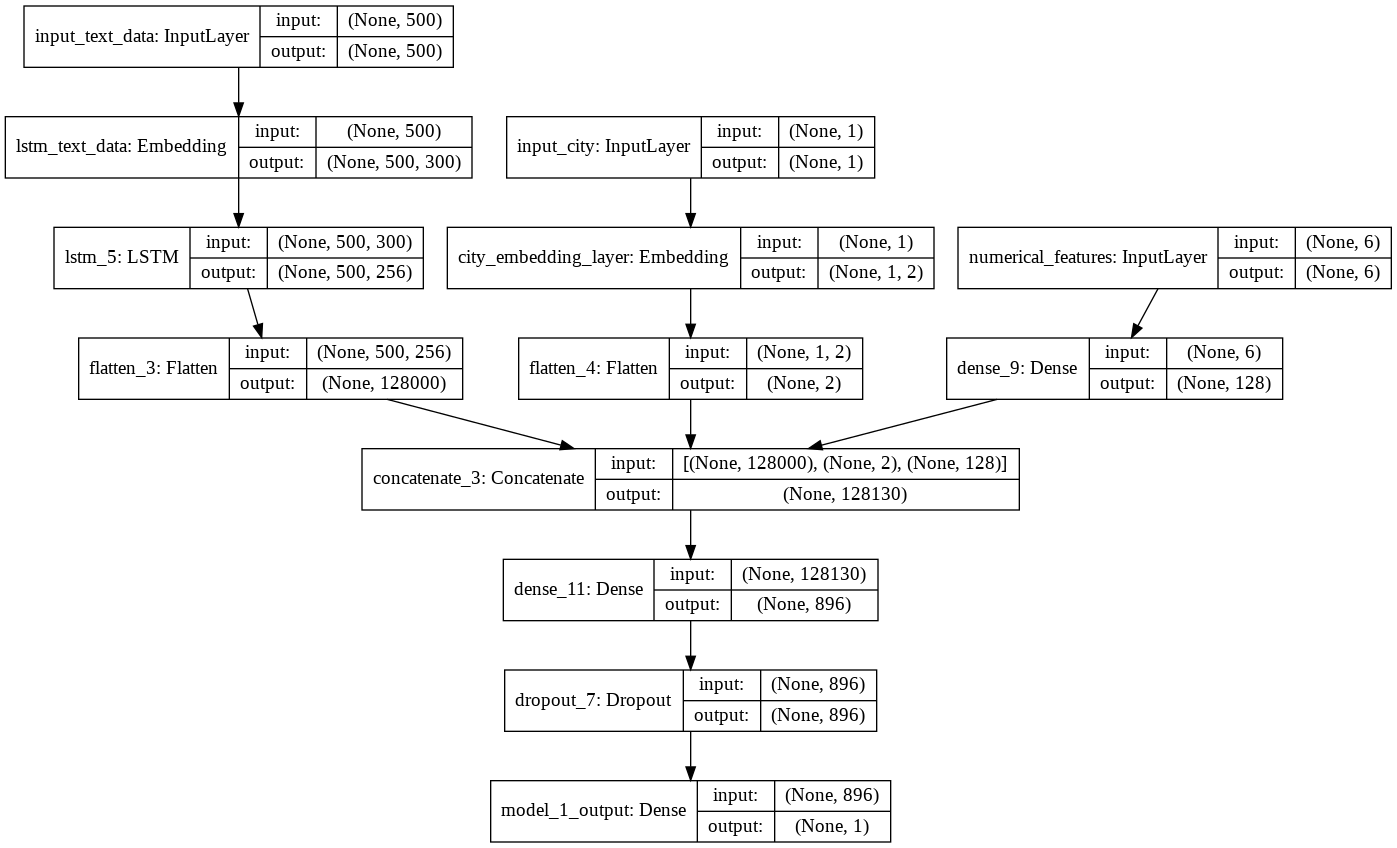

In [236]:
# Dense Layer 1
DL1 = Dense(896, activation = 'relu')(con_lay)

# Dropout 1
DP1 = Dropout(0.5)(DL1)

# Output
output = Dense(1, activation = 'linear', name= 'model_1_output')(DP1)

# READ THIS
# Model
# rename input_lay = input_text
# rename input_city = input_categorical
# rename input_numerical = input_numerical
# 
model1 = Model(inputs = [input_lay,input_city,inp_num], outputs = output)

plot_model(model1, show_shapes=True,show_layer_names=True, to_file='model1.png')

In [0]:
# Train data
tr_data_1 = [X_train_pad, city_tr,  tr_num ]

# CV data
cv_data_1 = [X_cv_pad, city_cv,  cv_num]

# Test data
test_data_1 = [X_test_pad, city_ts, test_num]


In [238]:
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text_data (InputLayer)    (None, 500)          0                                            
__________________________________________________________________________________________________
lstm_text_data (Embedding)      (None, 500, 300)     300000      input_text_data[0][0]            
__________________________________________________________________________________________________
input_city (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 500, 256)     570368      lstm_text_data[0][0]             
____________________________________________________________________________________________

### Neural network param calculations,


<!-- at input text = 300 * 1000 = 300000 <br>
at LSTM layer = 4 (256 * 300 + 256 ^ 2 + 256 ) = 570368<br>
at dense_9 layer = (6+1(bias)) * 128 = 896 <br>
at dense_18 layer = (128132 + 1 (bias) ) * 512 = 114807168 <br>
at model_1_output = (896+1) * 1 = 897 <br>
<br>
<br>
total params adding all = 300000 + 570368 + 896 + 114807168 + 897 = 115677537

 -->
